In [31]:
import cifar10
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
cifar10.data_path = "data/CIFAR-10/"

In [3]:
cifar10.maybe_download_and_extract()

- Download progress: 100.0%
Download finished. Extracting files.
Done.


In [4]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [9]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


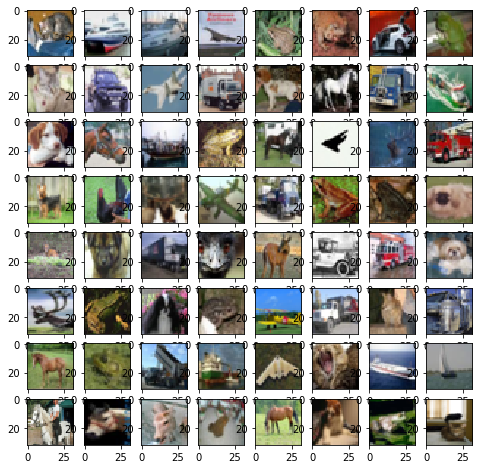

In [30]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(images_test[i],cmap=plt.cm.bone)
plt.show()

In [32]:
images_train.shape

(50000, 32, 32, 3)

In [34]:
x_train=images_train.reshape((50000,32*32*3))

In [36]:
pca=PCA()
pca.fit_transform(x_train)

array([[-6.40101763e+00,  2.72903876e+00,  1.50171052e+00, ...,
        -7.62287826e-04, -1.16359323e-03, -3.49768400e-04],
       [ 8.29783385e-01, -9.49943219e-01,  6.00375260e+00, ...,
         1.08434589e-04,  5.76715387e-04, -7.71005927e-04],
       [ 7.73019978e+00, -1.15221023e+01, -2.75362051e+00, ...,
        -1.04460109e-03, -2.14105740e-04, -3.93469526e-04],
       ...,
       [ 7.07346587e-01, -1.13425212e+01, -3.93914878e-01, ...,
        -3.80341568e-04,  1.86432348e-03,  1.44785229e-03],
       [ 1.13679090e+01, -3.37597765e+00,  5.56619766e+00, ...,
        -4.67096832e-04,  7.44972963e-04, -1.67065056e-03],
       [ 4.19279645e+00, -1.18418848e+00, -4.44596297e+00, ...,
         9.67968258e-04,  2.40363971e-04, -2.80506224e-05]])

In [47]:
pca.components_[3]

(3072,)

In [55]:
k=0
total=sum(pca.explained_variance_)
current=0
while current/total < 0.99:
    current+=pca.explained_variance_[k]
    k+=1
k

658

In [56]:
pca_cifar=PCA(k)
pca_cifar.fit_transform(x_train)

array([[-6.40101763e+00,  2.72903876e+00,  1.50171052e+00, ...,
         8.40052993e-02,  9.06223892e-03, -2.54217146e-02],
       [ 8.29783385e-01, -9.49943219e-01,  6.00375260e+00, ...,
        -1.08585600e-01, -3.28127478e-02,  1.55053290e-03],
       [ 7.73019978e+00, -1.15221023e+01, -2.75362051e+00, ...,
        -4.02812323e-02,  5.87721716e-02,  9.13516782e-02],
       ...,
       [ 7.07346587e-01, -1.13425212e+01, -3.93914878e-01, ...,
        -1.43830697e-02, -4.60778906e-02, -8.65502445e-02],
       [ 1.13679090e+01, -3.37597765e+00,  5.56619766e+00, ...,
        -2.58173804e-02, -4.31563440e-02,  1.90355184e-02],
       [ 4.19279645e+00, -1.18418848e+00, -4.44596297e+00, ...,
         6.08041004e-02, -5.04172575e-02,  6.95469382e-02]])